In [1]:
#Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_name

In [2]:
#Loading Datasets
pizza_df = pd.read_csv("pizzas.csv")
pizza_df.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [3]:
pizza_type_df = pd.read_csv("pizza_types.csv", encoding="latin1")
pizza_type_df.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [4]:
orders_df = pd.read_csv("orders.csv")
orders_df.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
order_deet_df = pd.read_csv("order_details.csv")
order_deet_df.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
#Merging the Four Datasets into one DataFrame

order_details = order_deet_df.merge(orders_df, on= "order_id", how="left")
order_details.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [7]:
order_details = order_details.merge(pizza_df, on="pizza_id", how="left")
order_details.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00


In [8]:
full_data = order_details.merge(pizza_type_df, on="pizza_type_id", how="left")
full_data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


### **Exploring the DataFrame**

In [9]:
#Checking the Number of rows and columns

full_data.shape

(48620, 12)

In [10]:
#Checking the Datatypes info

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [11]:
#Checking for null values

full_data.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [12]:
#Checking for Duplicated values

full_data.duplicated().sum()

np.int64(0)

In [13]:
#Passing Datetime columns to the appropriate datatype

full_data["date"] = pd.to_datetime(full_data["date"], errors="coerce")
full_data["time"] = pd.to_datetime(full_data["time"], format="%H:%M:%S", errors="coerce")
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [14]:
full_data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## **Exploratory Data Analysis**

### 1. Find the Total Revenue/Sales

In [15]:
#Find the Total Revenue/Sales

full_data["total revenue"] = full_data["quantity"] * full_data["price"]
total_revenue = full_data["total revenue"].sum()
print(f"The Total Revenue is ${total_revenue}")

The Total Revenue is $817860.05


##### The Total Revenue/Sales is $817860.05

### 2. Find the Total Quantity Sold

In [16]:
#Find the Total Quantity Sold

total_quantity = full_data["quantity"].sum()
print(f"The Total Quantity sold is {total_quantity}")

The Total Quantity sold is 49574


##### The Total Quantity sold is 49574

### 3. Find the Total Orders

In [17]:
#Find the Total Orders

total_orders = full_data["order_id"].nunique()
print(f"The Total Orders is {total_orders}")

The Total Orders is 21350


##### The Total Orders is 21350

### 4. Find the Number of Pizza Types

In [18]:
#Find the Number of Pizza Types

pizza_types = full_data["pizza_type_id"].nunique()
print(f"There are {pizza_types} pizza types")

There are 32 pizza types


##### There are 32 pizza types

### 5. Find the Average Price of the Pizzas

In [19]:
#Find the Average Price of the Pizzas

average_price = full_data["price"].mean()
print(f"The average price of the pizzas is ${average_price}")

The average price of the pizzas is $16.494132044426163


##### The average price of the pizzas is $16.494132044426163

### 6. Find the Peak Hours of Sales

In [20]:
#Find the Peak Hours of Sales

full_data["sales hour"] = pd.to_datetime(full_data["time"], format="%H:%M:%S").dt.hour
sales_by_hour = full_data.groupby("sales hour")["total revenue"].sum()
peak_hours = sales_by_hour.nlargest(2).index
peak_hours

Index([12, 13], dtype='int32', name='sales hour')

##### Based on the analysis conducted, the peak hours of sales are 12 noon and 1 o'clock pm

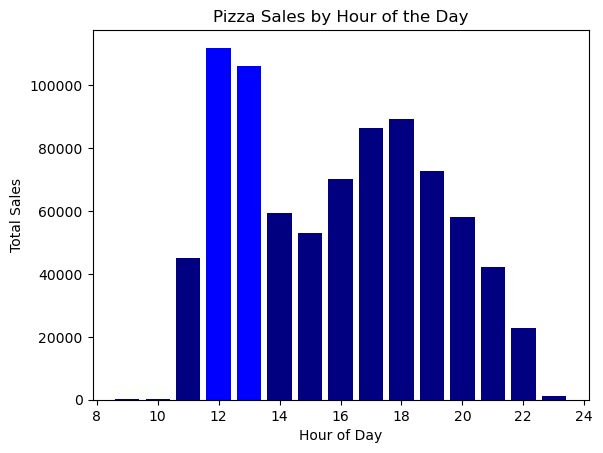

In [21]:
#Barchart that shows pizza sales by hour of the day

colors = ["blue" if hour in peak_hours else "navy" for hour in sales_by_hour.index]
fig, ax = plt.subplots()
plt.bar(sales_by_hour.index, sales_by_hour.values, color=colors)
plt.title("Pizza Sales by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.show()

### 7. Find the total sales made on each day of the week. 
### Which day of the week is when sales are made the most?


In [22]:
#Finding the total sales made on each day of the week

full_data["sales day"] = pd.to_datetime(full_data["date"]).dt.day_name()
sales_by_day = full_data.groupby("sales day")["total revenue"].sum()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = sales_by_day.reindex(days_order)

#Finding the peak sale day
peak_sale_day = sales_by_day.idxmax()
peak_sale_day

'Friday'

##### The peak sale day is **Friday**

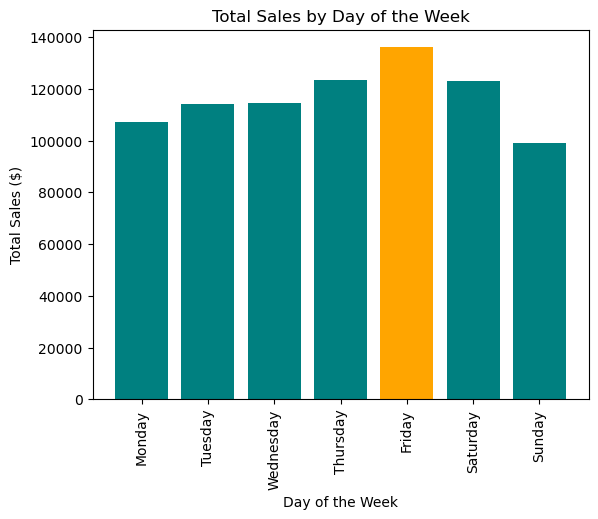

In [23]:
#A Barchart that shows the total sales made on each day of the week and the peak sale day

colors = ["orange" if day == peak_sale_day else "teal" for day in sales_by_day.index]
plt.bar(sales_by_day.index, sales_by_day.values, color=colors)
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.show()

### 8. Find the top 5 bestselling pizzas


In [24]:
#Finding the top 5 bestselling pizzas

top_pizzas = full_data.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)
top_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

##### The Top 5 bestselling pizzas are **The Classic Deluxe Pizza**, **The Barbecue Chicken Pizza**, **The Hawaiian Pizza**, **The Pepperoni Pizza**, **The Thai Chicken Pizza**

### 9. Find the sales made in each month. Any trend noticeable?


In [25]:
#Finding the sales made in each month

full_data["month"] = full_data["date"].dt.month_name()
monthly_sales = full_data.groupby("month")["total revenue"].sum()
monthly_sales = monthly_sales.reindex(list(month_name)[1:])
monthly_sales

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: total revenue, dtype: float64

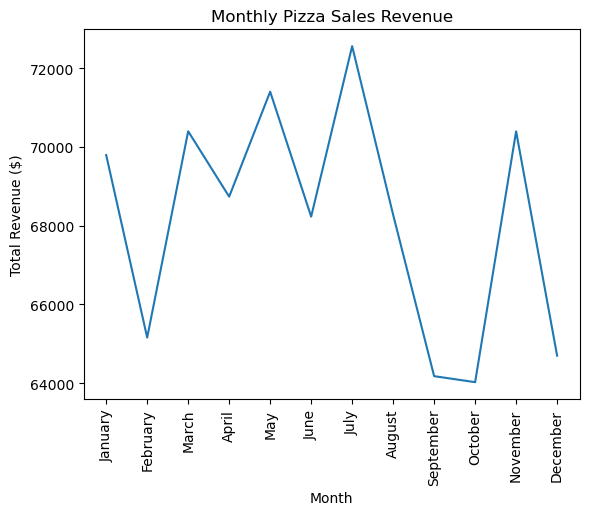

In [26]:
#A lineplot that depicts the trend of monthly sales

plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Monthly Pizza Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=90)
plt.show()

##### The lineplot shows an uptrend in sales from February to August followed by a decline in sales during the months of september, october and december. Based on this analysis, there isn't a consistent trend of sales over the months.

### 10. Are there pizza types that are not doing well on the menu?


In [27]:
#Finding low performing pizzas on the menu

pizza_types = full_data.groupby("pizza_type_id")["quantity"].sum().sort_values()
pizza_types.head(10)

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
spin_pesto      970
ckn_pesto       973
ital_veggie     981
ckn_alfredo     987
green_garden    997
Name: quantity, dtype: int64

##### The lowest performing pizzas on the menu are: brie_carre, mediterraneo, calabrese, spinach_supr, soppressata, spin_pesto, ckn_pesto, ital_veggie, ckn_alfredo, green_garden


In [28]:
#Dropping irrelevant columns
full_data = full_data.drop(["order_id", "pizza_id", "date", "time"], axis=1)

In [29]:
#Setting index
full_data.set_index("order_details_id", inplace=True)

In [30]:
#Saving the new dataset
full_data.to_csv("clean data for pizza sales.csv", index=False)